os — Miscellaneous operating system interfaces - This module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module. For creating temporary files and directories see the tempfile module, and for high-level file and directory handling see the shutil module.

The tarfile module makes it possible to read and write tar archives, including those using gzip or bz2 compression. Use the zipfile module to read or write .zip files, or the higher-level functions in shutil.

six is a package that helps in writing code that is compatible with both Python 2 and Python 3. 

from six.moves import urllib
imports urllib when run with Python3 and imports a mixture of urllib, urllib2 and urlparse with Python2, mimicking the structure of Python3's urllib.

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing=load_housing_data()

housing.head()

#housing.info()  #name of columns, number of values, null?, type

#housing["ocean_proximity"].value_counts()  #which value how many times

#housing.describe()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

The 25%, 50%, and 75% rows show the corresponding
percentiles: a percentile indicates the value below which a given percentage of observations in a group
of observations falls. For example, 25% of the districts have a housing_median_age lower than 18,
while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or
1st quartile), the median, and the 75th percentile (or 3rd quartile).

The housing median age and the median house value were capped (they don't show in detail everything that goes beyond a certain limit, they collect everything over that limit and represent it as one hist colum)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AE40BD0>,
      dtype=object)

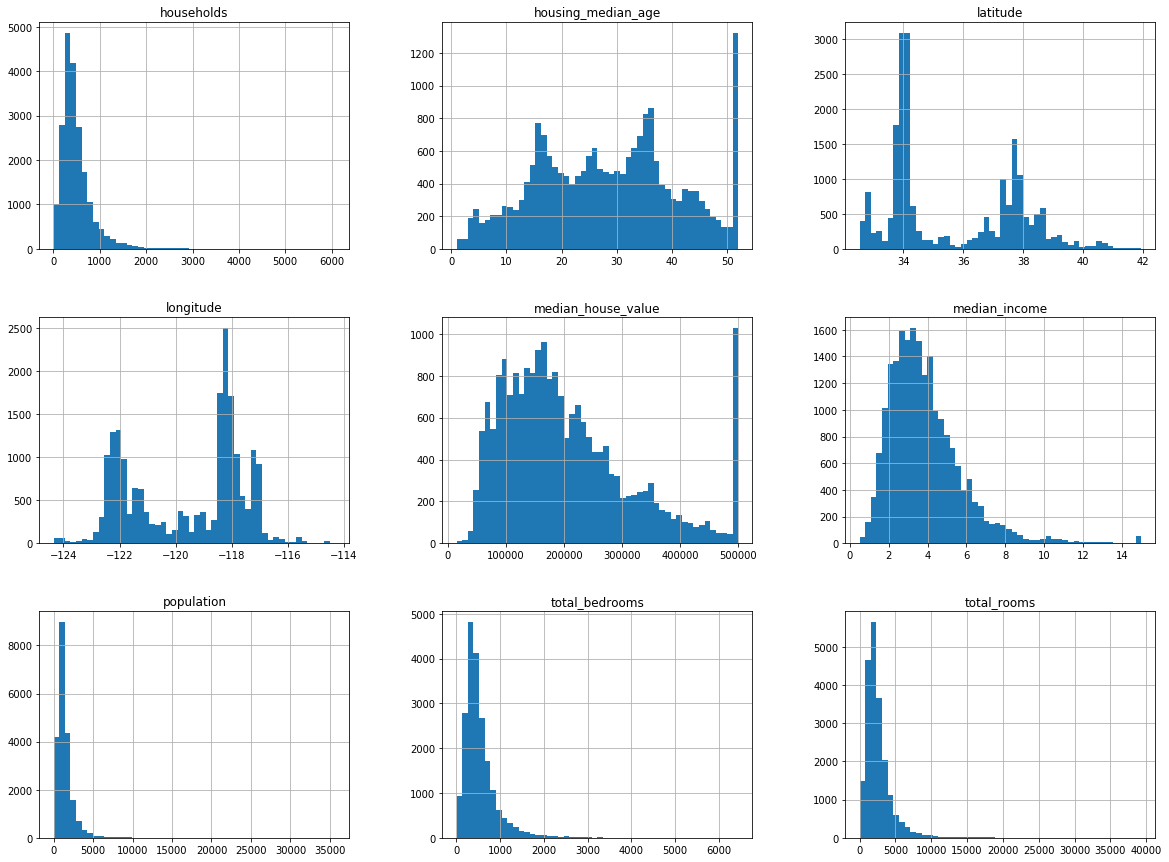

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))  #number of instances(x axis) that have given value range(y axis)

### Problems:

First, the median income attribute does not look like it is expressed in US dollars (USD). The data has been scaled and
capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for
lower median incomes. 

The housing median age and the median house value were also capped. The Machine Learning algorithms
may learn that prices never go beyond that limit. 

These attributes have very different scales. 

Many histograms are tail heavy: they extend much farther to the right of the median than
to the left. This may make it a bit harder for some Machine Learning algorithms to detect
patterns. Try transforming these attributes later on to have more bell-shaped
distributions

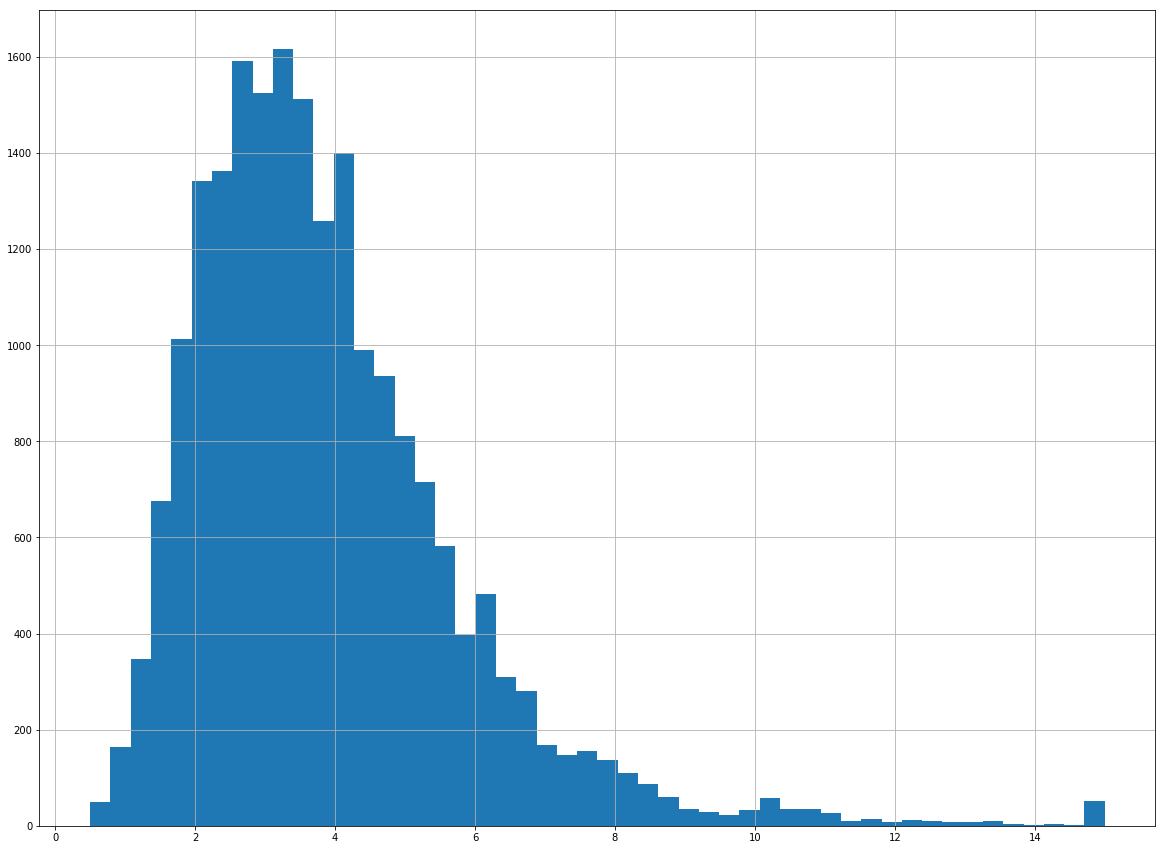

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)  #random sampling is fine if the dataset is large,
#especially relative to the number of attributes

housing["median_income"].hist(bins=50, figsize=(20,15))  #bins=num of hist columns, higher means the values on y size 
#will probably get smaller because values on x axis would be more widespread, lower num of bins will make y values higher as
#those on x axis will be more concentrated

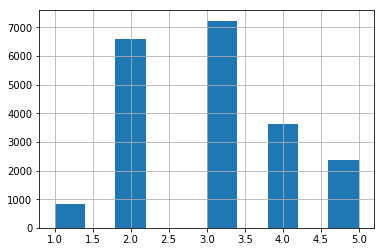

In [4]:
import numpy as np
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)  #scaling down 1.5 times, to limit the num of income categories and rounding up
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)  #up to 5.0, if higher, include in 5.0
#inplace=True-instead of having to assign the variable back to itself or to a new variable name ????

housing["income_cat"].hist()

### split.split(housing,housing["income_cat"]) means

split.split(X, y, groups=None)
Generate indices to split data into training and test set.

Parameters
----------
X : array-like, shape (n_samples, n_features)
    Training data, where n_samples is the number of samples
    and n_features is the number of features.

y : array-like, shape (n_samples,)
    The target variable for supervised learning problems.
    Stratification is done based on the y labels.

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)  #cross-validation model, makes train/test split picking
#random row indexes, 20% for test this time. The indices are random but always the same, because of the rand seed
for train_index, test_index in split.split(housing,housing["income_cat"]):  #?? train_index & test_index are predefined
    strat_train_set=housing.loc[train_index]  #loc=access a group of rows and columns by label(s) or a boolean array
    strat_test_set=housing.loc[test_index]
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [17606 18632 14650 ... 13908 11159 15775] TEST: [ 5241 10970 20351 ...  4019 12107  2398]


In [6]:
housing["income_cat"].value_counts() / len(housing)  #overall values

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [7]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)  #comparing stratified sampling to overall values in dataset


3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

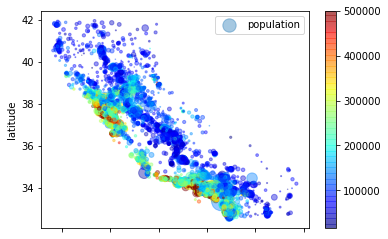

In [8]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1,inplace=True)  #deleting income_cat

housing=strat_train_set.copy()  #to put the test set aside

housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.4,  #with alpha it is revealed where's a high density of data points
            s=housing["population"]/100, label="population",
            c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Pearson's standard correlation coefficient:

<img src="image2.png">

In [9]:
corr_matrix=housing.corr()  #standard correlation coeficient

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong
positive correlation; for example, the median house value tends to go up when the median income goes up.
When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a
small negative correlation between the latitude and the median house value (i.e., prices have a slight
tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear
correlation.

The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely
miss out on nonlinear relationships (e.g., “if x is close to zero then y generally goes up”). 

In [10]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Possible correlations:

<img src="image3.png">

c:\users\hp elitebook 8470p\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E90FF50>,
      dtype=object)

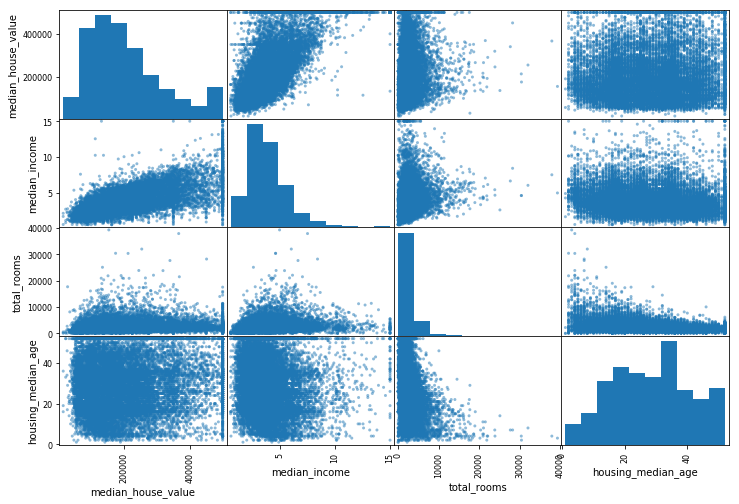

In [11]:
#plotting correlations between attributes that seem to be most correlated witg median house value
from pandas.tools.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

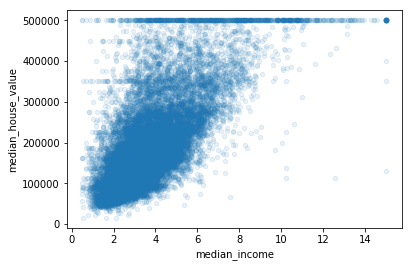

In [12]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
#the straight lines at 500,450,350,280 thousand are not good xD = quirks, soluton-remove these districts

In [13]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"] 

corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the data for ml algos

In [14]:
housing=strat_train_set.drop("median_house_value", axis=1)  #in housing there's no median_house_value anymore as we want to separate
#xs from ys, only x in housing

housing_labels=strat_train_set["median_house_value"].copy()  #only median_house_value (y) in housing_labels 

### dropna()
 deletes rows where a value of some column is None
    
### drop()
 deletes entire column if some values are None
    
### fillna() 
 fills in None values in some column with value given (computed mean, median,...)

In [15]:
from sklearn.impute import SimpleImputer  #class for replacing missing values with what is specified, median in this case
imputer=SimpleImputer(strategy="median")

housing_num=housing.drop("ocean_proximity",axis=1)  #to create dataset with num values only

imputer.fit(housing_num)

#imputer.statistics_

#housing_num.median().values

X=imputer.transform(housing_num)  #could have been fit_trainsform(housing_num) at once

housing_tr=pd.DataFrame(X,columns=housing_num.columns)  #X is a numpy array, must be transformed into pandas dataframe

#housing_tr.info()

housing_cat = housing[['ocean_proximity']]


from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

#one-hot encoding-one attr in row (one category) equal to 1 and others 0
#fit_transform expects 2d arrat and housing_cat_encoded is 1d, needs to be reshaped
from sklearn.preprocessing import OneHotEncoder  #encodes integer categorical values into one-hot vectors
encoder=OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))


housing_cat_1hot  #sparse matrix, only remembers locations of 1s, because a matrix of a bunch of additional 0s would be a waste of space

housing_cat_1hot.toarray()

c:\users\hp elitebook 8470p\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### Scikit learn relies on DUCK TYPING: In duck typing, an object's suitability is determined by the presence of certain methods and properties, rather than the type of the object itself(inheritance).

In [16]:
#custom transformer
from sklearn.base import BaseEstimator, TransformerMixin  #TransformerMixin is to get fit_transform implicitly
#and BaseEstimator for implicitly getting get_params() and set_params(), useful for automatic hyperparameter tuning
#also I don't have to type **args and **kargs in constructor

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
#the purpose of this is to figure out if adding bedrooms_per_room helps ml algorithms or not (automating this prep step)
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room  #hyperparameter, true by default
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

## IMPORTANT
There are two common ways to get all attributes to have the same scale: min-max scaling and
standardization.


Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled
so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max
minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a
feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.


Standardization is quite different: first it subtracts the mean value (so standardized values always have a
zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike
min-max scaling, standardization does not bound values to a specific range, which may be a problem for
some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income
equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–
0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called
StandardScaler for standardization.


WARNING

As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test
set). Only then can you use them to transform the training set and the test set (and new data)

In [17]:
from sklearn.pipeline import Pipeline  #to make sure that data transformations are done in the right order
#classical pipeline, transforms data and sends it to next transformer, all must have fit_transform except the last one
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

housing_prepared.shape

(16512, 16)

np.allclose(a,b) - checks if 2 np arrays are equal

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("Predictions:\t",lin_reg.predict(some_data_prepared))

Predictions:	 [210656. 317792. 211328.  59168. 189824.]


In [19]:
print("Labels:\t",list(some_labels))

Labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [20]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

lin_rmse  #prediction error of 68629$ which sucks big time, means that model is underfitting

68629.3260519741

In [21]:
#using a more powerful model
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions=tree_reg.predict(housing_prepared)

tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse  #probably overfitting hahah

0.0

In [22]:
from sklearn.model_selection import cross_val_score
tree_scores=cross_val_score(tree_reg,housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
#neg because cross validation uses a utility function, so bigger is better
tree_rmse_scores=np.sqrt(-tree_scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)    

Scores:  [69180.47048939 65443.64656117 72794.9497339  68036.21626812
 71449.05025425 74322.30400578 69442.98221708 71082.76533877
 78003.10584397 69836.86860734]
Mean:  70959.23593197808
Standard deviation: 3320.2388958476795


In [23]:
lin_scores=cross_val_score(lin_reg,housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores:  [66757.24872434 66955.549825   70347.95244419 74753.19435503
 68028.34987393 71193.84183426 64988.67337893 68272.67633576
 71551.23476165 67665.7126089 ]
Mean:  69051.44341419876
Standard deviation: 2734.3257892610804


In [24]:
from sklearn.ensemble import RandomForestRegressor  #ensemble learning - building a model on top of many other models, this one always overfits
forest_reg=RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [25]:
from sklearn.model_selection import cross_val_score

forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels, scoring= "neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean:  52583.72407377466
Standard deviation: 2298.353351147122


In [ ]:
from sklearn.model_selection import GridSearchCV  #this is god, finds best hyperparameters
param_grid=[{'n_estimators':[100,150,300], 'max_features':[7,8,9]},
           #{'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
           ]
forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')  #refit=True means that once the best
#estimator is found, it is retrained on the training set again
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Can't work because not enough memory

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs=["rooms_per_household","bedrooms_per_room","population_per_household"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value", axis=1)
y_test=strat_test_set["median_house_value"].copy()

X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse